<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/RandomForest_advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRACTICA RANDOM FOREST ADVERTINSING.CSV

In [22]:
# 1 Tratamiento de datos
import numpy as np
import pandas as pd
# Gráficos
import matplotlib.pyplot as plt
# Preprocesado y moYdelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from google.colab import files

file = files.upload()

Saving Advertising.csv to Advertising.csv


In [24]:
df = pd.read_csv("Advertising.csv")

In [25]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [26]:
df.shape

(200, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Separo la entrada (X) de la salida (y=sales)

In [28]:
X = df.drop('Sales', axis=1)
y = df['Sales']

DIVIDO EL CONJUNTO DE DATOS

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Visualizo tuplas

In [32]:
print(f"Tuplas de entrenamiento: {X_train.shape}")
print(f"Tuplas Test: {X_test.shape}")

Tuplas de entrenamiento: (160, 4)
Tuplas Test: (40, 4)


Inicializo el árbol de desición de regresión

In [41]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)

Entreno

In [50]:
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Calculo la predición

In [54]:
y_pred_decision_train = decision_tree_reg.predict(X_train)

Error cuadrático medio (rme) y puntuación (r^2) del entrenamiento

In [58]:
mse_decision_train = mean_squared_error(y_train, y_pred_decision_train)
r2_decision_train = r2_score(y_train, y_pred_decision_train)

In [59]:
print(f"Error cuadrático medio (rme) (Arbol de decision Entrenamiento): {mse_decision_train}")
print(f"r^2 (Arbol de decision Entrenamiento): {r2_decision_train}")

Error cuadrático medio (rme) (Arbol de decision Entrenamiento): 0.0
r^2 (Arbol de decision Entrenamiento): 1.0


predicción para el conjunto de pruebas .predict()

In [63]:
y_pred_decision_test = decision_tree_reg.predict(X_test)

 los valores rme y r^2 del conjunto de pruebas

In [64]:
mse_decision_test = mean_squared_error(y_test, y_pred_decision_test)
r2_decision_test = r2_score(y_test, y_pred_decision_test)

In [66]:
print(f"Error cuadrático medio (rme) (Arbol de decision Entrenamiento): {mse_decision_test}")
print(f"r^2 (Arbol de decision Entrenamiento): {r2_decision_test}")

Error cuadrático medio (rme) (Arbol de decision Entrenamiento): 1.7627500000000005
r^2 (Arbol de decision Entrenamiento): 0.9441524303613241


visualizar árboles de decisión

In [67]:
pip install graphviz

Pintamos el árbol de decisión

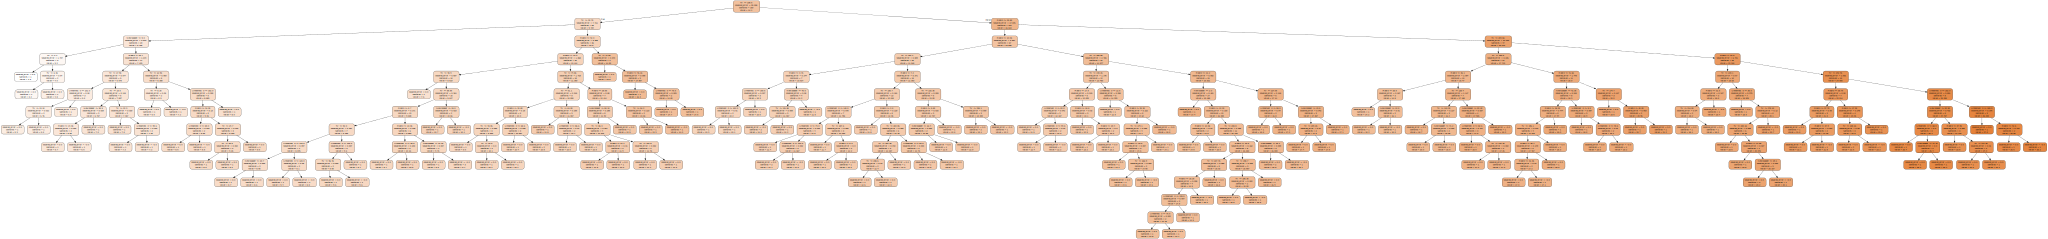

In [68]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os

export_graphviz(
    decision_tree_reg,
    out_file="Arbol_Decision_Regresor.dot",
    feature_names=X_train.columns,class_names=["TV", "Radio", "Newspaper"],
    rounded=True,
    filled=True
)
Source.from_file("Arbol_Decision_Regresor.dot")

Inicializo el algoritmo de regresión frandom forest

In [69]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

Entrenamos dicho algoritmos

In [71]:
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predecimos el conjunto de entrenamiento y testeo

In [73]:
y_pred_decision_train = random_forest_reg.predict(X_train)
y_pred_decision_test = random_forest_reg.predict(X_test)

Calculo los valores rme y r^2 del entrenamiento y del test

In [74]:
mse_decision_test = mean_squared_error(y_test, y_pred_decision_test)
r2_decision_test = r2_score(y_test, y_pred_decision_test)

In [78]:
print(f"Error cuadrático medio (rme) (Arbol de decision de prueba): {mse_decision_test}")
print(f"r^2 (Arbol de decision de prueba): {r2_decision_test}")

Error cuadrático medio (rme) (Arbol de decision de prueba): 0.6769128999999989
r^2 (Arbol de decision de prueba): 0.9785539978317583


In [77]:
mse_decision_train = mean_squared_error(y_train, y_pred_decision_train)
r2_decision_train = r2_score(y_train, y_pred_decision_train)

In [79]:
print(f"Error cuadrático medio (rme) (Arbol de decision Entrenamiento): {mse_decision_train}")
print(f"r^2 (Arbol de decision Entrenamiento): {r2_decision_train}")

Error cuadrático medio (rme) (Arbol de decision Entrenamiento): 0.10394046875000003
r^2 (Arbol de decision Entrenamiento): 0.9959924634922165
